In [111]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns





In [112]:
#reading the CSV file 
df = pd.read_csv('/Users/pooja/Documents/ride_data.csv')
df1 = pd.read_csv('/Users/pooja/Documents/city_data.csv')

temp=df.groupby(['city'])['ride_id'].count()
temp1=df.groupby(['city'])['fare'].sum()

result=temp.to_frame().join(temp1.to_frame()).reset_index()

result['Avg_per_city']= result['fare']/result['ride_id']

#result= result.reset_index

#result.head()

result1 = result.merge(df1, on='city')

result1.head()


,city,ride_id,fare,Avg_per_city,driver_count,type
0,Adamschester,9,266.35,29.594444,27,Suburban
1,Alexisfort,33,903.11,27.366970,24,Urban
2,Amberberg,16,457.99,28.624375,13,Suburban
3,Anthonyfurt,17,501.35,29.491176,17,Suburban
4,Boyleberg,5,161.98,32.396000,13,Suburban


In [113]:
result_Urban=result1.loc[result1['type'] == 'Urban']
#print(result_Urban.head())

result_Suburban=result1.loc[result1['type'] == 'Suburban']
#print(result_Suburban.head())

result_Rural=result1.loc[result1['type'] == 'Rural']
#print(result_Rural.head())




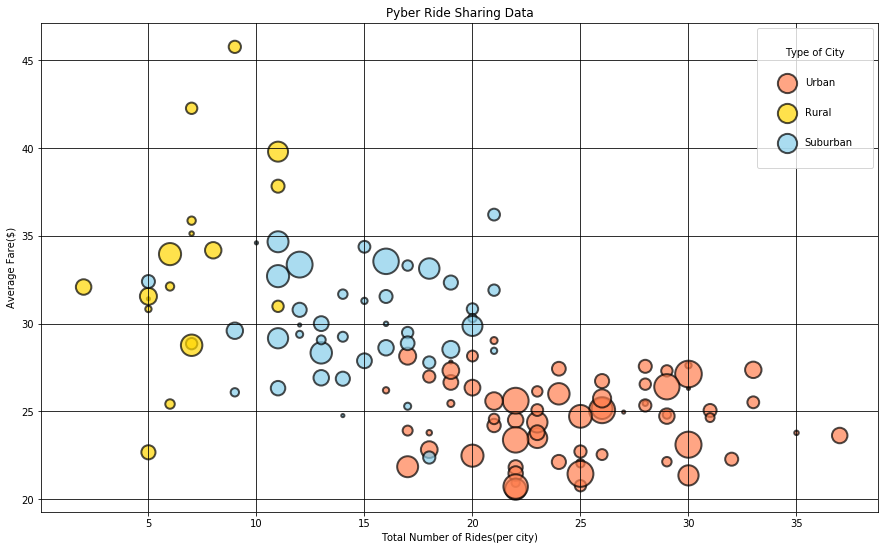

Note: The size of the bubble corelates to the number of drivers per city


In [114]:
ax=result_Urban.plot.scatter(x='ride_id', y='Avg_per_city', s=10*result1.driver_count, color='coral', label='Urban',alpha=0.7, edgecolor='black',linewidth=2.0)

result_Rural.plot.scatter(x='ride_id', y='Avg_per_city', s=10*result1.driver_count, color='gold',ax=ax,label='Rural',alpha=0.7, edgecolor='black',linewidth=2.0)

result_Suburban.plot.scatter(x='ride_id', y='Avg_per_city', s=10*result1.driver_count, color='skyblue',ax=ax,label='Suburban',alpha=0.7, edgecolor='black',linewidth=2.0)


fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlabel("Total Number of Rides(per city)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data")
ax.legend(loc='upper right', borderpad=2,labelspacing=2, title='Type of City')

plt.grid(True,color='black')
plt.show()
print("Note: The size of the bubble corelates to the number of drivers per city")






In [115]:
#result1.plot.scatter(x='ride_id', y='Avg_per_city', s=5*result1.driver_count)



In [126]:
Sum_fare = result1['fare'].sum()
city_type_fare= result1.groupby(['type'])['fare'].sum()



#print(Sum_fare)

Avg_fare=((city_type_fare/Sum_fare)*100).round(decimals=2)


print(Avg_fare)



type
Rural        6.76
Suburban    29.74
Urban       63.49
Name: fare, dtype: float64


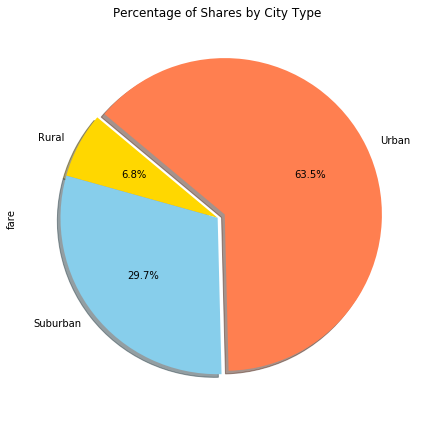

In [150]:
labels =['Rural','Suburban','Urban']

colors = ['gold', 'skyblue','coral']
explode = (0, 0, 0.05) 
Avg_fare.plot.pie(colors=colors,explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)

fig_size1 = plt.rcParams["figure.figsize"]
fig_size1[0] = 6
fig_size1[1] = 6
plt.rcParams["figure.figsize"] = fig_size1


plt.title("Percentage of Shares by City Type")
plt.tight_layout()

#plt.axes().set_ylabel('')

#axis1=plt.axes()

#axis1.get_yaxis().set_visible(False)


plt.show()




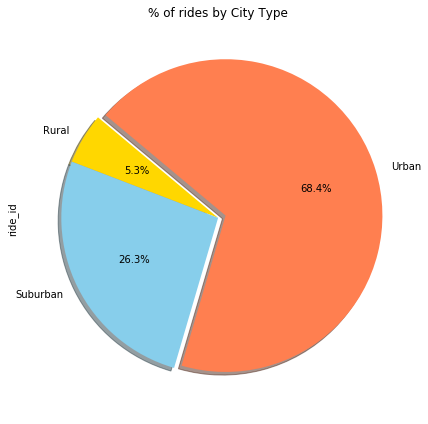

In [149]:
Sum_rides = result1['ride_id'].sum()
city_type_rides= result1.groupby(['type'])['ride_id'].sum()
Avg_rides=((city_type_rides/Sum_rides)*100).round(decimals=2)


#print(Avg_rides)

labels =['Rural','Suburban','Urban']

colors = ['gold', 'skyblue','coral']
explode = (0, 0, 0.05) 
Avg_rides.plot.pie(colors=colors,explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
fig_size2 = plt.rcParams["figure.figsize"]
fig_size2[0] = 6
fig_size2[1] = 6
plt.rcParams["figure.figsize"] = fig_size2


plt.title("% of rides by City Type")
plt.tight_layout()
#plt.axes().set_ylabel('')

plt.show()




/Users/pooja/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


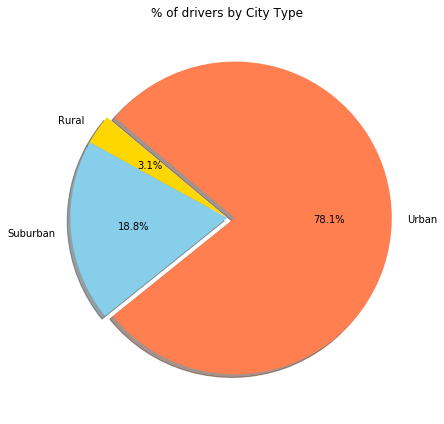

In [157]:
Sum_drivers = result1['driver_count'].sum()
city_type_drivers= result1.groupby(['type'])['driver_count'].sum()
Avg_drivers=((city_type_drivers/Sum_drivers)*100).round(decimals=2)


#print(Avg_rides)

labels =['Rural','Suburban','Urban']

colors = ['gold', 'skyblue','coral']
explode = (0, 0, 0.05) 
Avg_drivers.plot.pie(colors=colors,explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
fig_size3 = plt.rcParams["figure.figsize"]
fig_size3[0] = 6
fig_size3[1] = 6
plt.rcParams["figure.figsize"] = fig_size3


plt.title("% of drivers by City Type")
plt.tight_layout()
plt.axes().set_ylabel('')
plt.show()

